In [1]:
# Step 1: Initial settings
%cd /content/
!rm -rf elapy
!git clone https://github.com/okumakito/elapy.git
%cd ./elapy/
import elapy as ela

/content
Cloning into 'elapy'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 151 (delta 39), reused 5 (delta 5), pack-reused 83
Receiving objects: 100% (151/151), 1.44 MiB | 4.25 MiB/s, done.
Resolving deltas: 100% (72/72), done.
/content/elapy


In [2]:
# Step 2: Load data
#   * {0,1}-valued matrix
#   * pandas DataFrame object
#   * rows are varibles
#   * columns are observations or time points

# load test data
data = ela.load_testdata(1)

In [3]:
# Step 3: Main calculation

# Fit an Ising model to the data.
h, W = ela.fit_exact(data)

# Check fitting accuracy scores (1: best, 0: worst).
acc1, acc2 = ela.calc_accuracy(h, W, data)
print(acc1, acc2)

# Calculate a basin graph.
graph = ela.calc_basin_graph(h, W, data)

# Calculate a disconnectivity graph.
D = ela.calc_discon_graph(h, W, data, graph)

# Calculate each state's frequency and transitions between states.
freq, trans, trans2 = ela.calc_trans(data, graph)

# Calculate transition matrix based on Boltzmann machine
P = ela.calc_trans_bm(h, W, data)

0.9044968526547666 0.9044970585566828


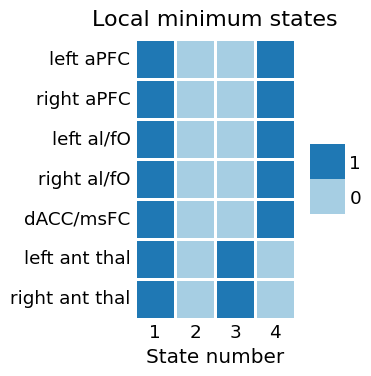

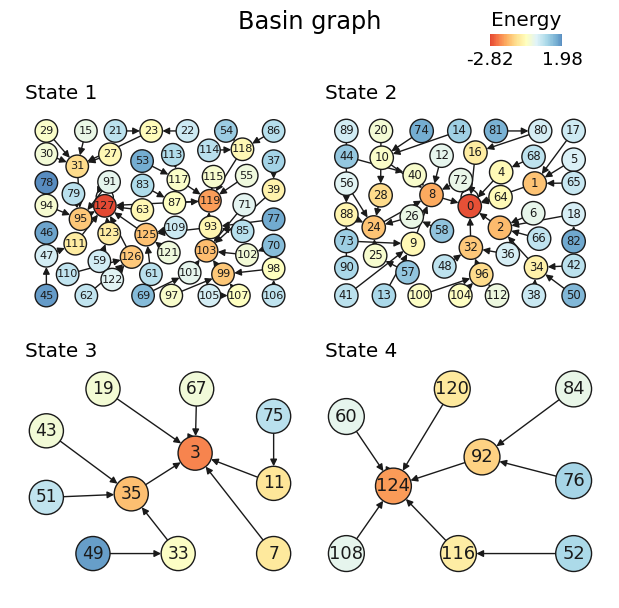

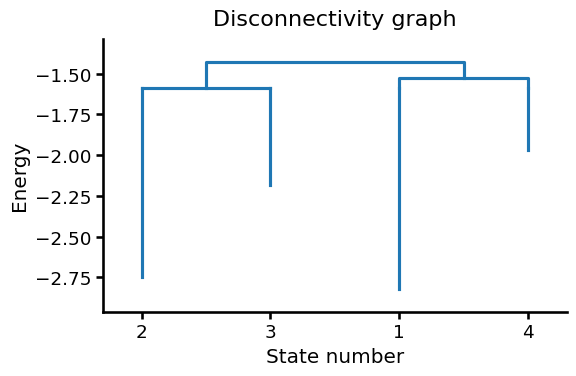

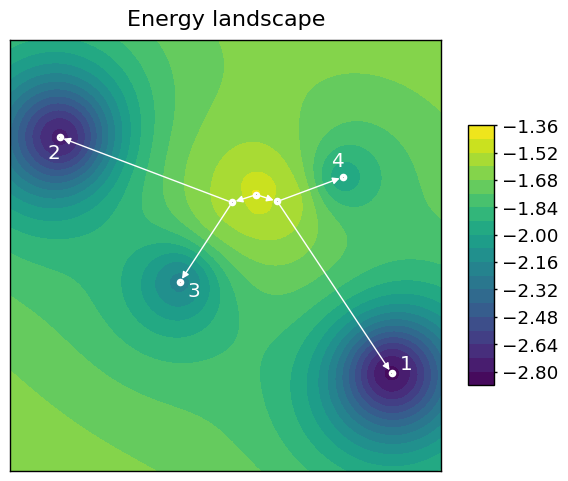

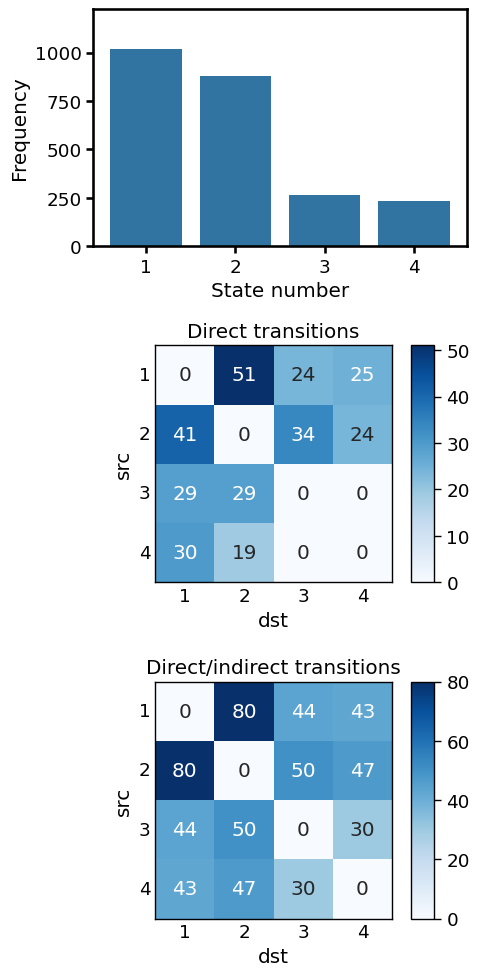

In [5]:
# Step 4: Plot results

# Plot on-off patterns of each local minimum.
ela.plot_local_min(data, graph)

# Plot the basin graph.
ela.plot_basin_graph(graph)

# Plot the disconnectivity graph.
ela.plot_discon_graph(D)

# Plot a two-dimensional landscape.
ela.plot_landscape(D)

# Plot each state's frequency and transitions between states.
ela.plot_trans(freq, trans, trans2)

In [7]:
# Step 5: Plot results with Plotly

# Plot a three-dimensional landscape.
ela.plot_landscape3d(D)